In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8-white')

Effects of holidays on births in the USA

In [7]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]

<Axes: >

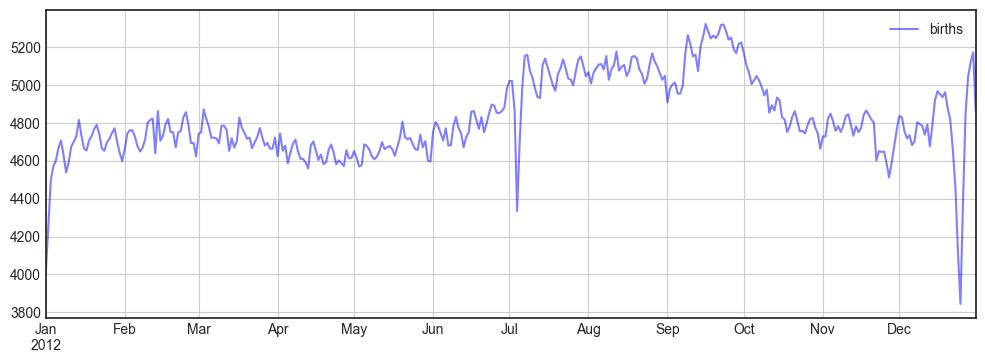

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax, color='blue', alpha=0.5, legend=True, grid=True)

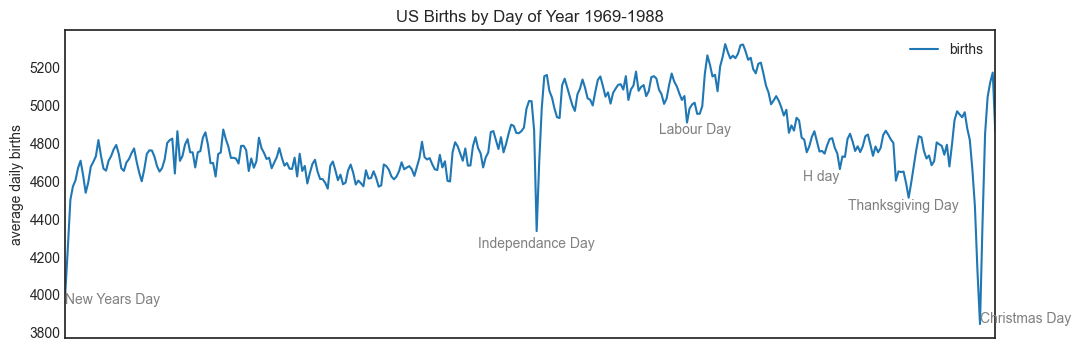

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, 'New Years Day', **style)
ax.text('2012-7-4', 4250, 'Independance Day', ha='center', **style)
ax.text('2012-9-4', 4850, 'Labour Day',ha='center', **style)
ax.text('2012-10-31', 4600, 'H day', ha='right', **style)
ax.text('2012-11-25', 4450, 'Thanksgiving Day', ha='center', **style)
ax.text('2012-12-25', 3850, 'Christmas Day', ha='left', **style)

ax.set(title='US Births by Day of Year 1969-1988', ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%B'))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))  # Set minor locator to the 15th of each month